<a href="https://colab.research.google.com/github/smddkt/ML-DL-Study/blob/main/%EB%B6%84%EB%A5%98_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled= ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #proba() 메서드는 클래스별 확률값을 반환한다.
print(np.round(proba, decimals=4)) #decimal 매개변수가 소수점 아래 몇자리 유지할지 정함.

#클래스 확률: 주변 이웃들 중에서 그 클래스인 이웃의 비율

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


선형 방정식 예시:
 z = a x 무게 + b x 길이 + c x 높이+ d

 a, b, c 는 가중치 혹은 계수. z는 어떤 값도 가능하지만, 0과 1사이여야 한다. 만약 z가 큰 음수일 때 0으로, 큰 양수일 때 1로 바꿀 수 있다면?

 시그모이드 함수(==로지스틱 함수)는 그걸 가능하게 해준다. 범위를 0~1까지로 압축해주는 것. 183쪽의 그래프 참고

 시그모이드 값이 0.5보다 크면(Z값이 0보다 크면) 양성 클래스, 작으면 음성 클래스로 분류한다.(이진 분류의 경우)

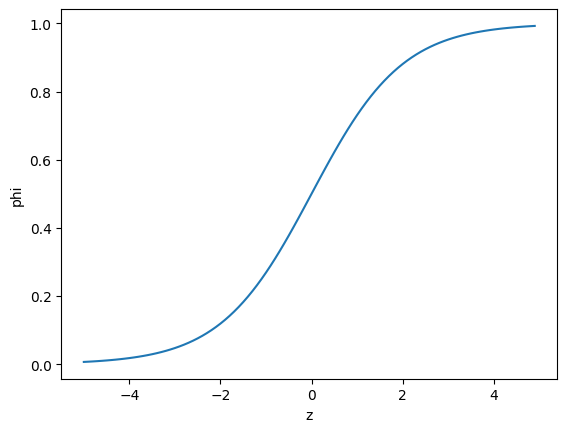

In [ ]:
#넘파이를 사용해 -5와 5 사이에 0.1 간격으로 배열 z를 만들고, 그 위치마다 시그모이드 함수를 계산하기

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z)) #공식임
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target =='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.
z = -0.404 x (weight) - 0.576 x (length) ..... -2.161 이다.

로지스틱 회귀 모델로 z값도 계산할 수 있다.
deciseion_function() 메서드를 사용하면 된다.

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) # train_bream_smelt의 처음 5개 샘플의 z값을 출력

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
#위의 z값을 시그모이드 함수에 통과시켜서 확률을 얻을 수 있다. expit()함수.

from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


**로지스틱 회귀로 다중분류 수행하기.**

7개의 생선 중 어떤 생선인지?

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


intercept가 7개나 있다. (7, ) 에서.

이진 분류에서는 2개만 계산하던 z 를 7개나 계산한다는 의미. 각 클래스마다 z값을 하나씩 계산하고, 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

또한 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했다.

다중분류에서는 시그모이드 함수 대신 소프트맥스 함수를 사용해서 7개의 값을 확률로 변환한다. 소프트맥스가 시그모이드랑 다른 점은, 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체의 합이 1이 되도록 만든다는점. 그래서 지수함수를 사용한다.

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals =3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 경사 하강법

대표적인 점진적 학습 방법이다.

확률적 == 무작위하게, 랜덤하게.

**딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라서,**

경사 == 기울기, 하강법 = 내려가는 방법.

**"가장 가파른 길"을 찾고, "조금씩" 내려오는 방법이다.**

손실 함수: 분류에서 정답을 못 맞히는 비율을 함수로 나타낸 거. 근데 이렇게 하면 샘플의 개수에 따라서 정확도가 불연속적으로밖에 표현이 안 됨. 경사 하강법을 이용하려면 손실 함수가 완전히 연속적이어야만 하는데.

로지스틱 회귀 모델이 확률을 출력하는 방법대로 하면, 0~1 사이의 어떤 값도 확률이 될 수 있는 연속적인 특성을 가짐.

만약 샘플 네 개의 예측 확률이 각각 0.9, 0.3, 0.2, 0.8이라면, 어떻게 손실함수를 만들 수 있을지 **로지스틱 손실 함수**를 이용해서 살펴보자.

첫 번째 샘플의 예측은 0.9이므로 양성 클래스의 타깃인 1과 곱한 다음, 음수로 바꿈.

예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아지고, 더 손실이 낮고 정확도가 높은 모델이라고 할 수 있다.

두 번째 샘플의 예측은 0.3이므로 타깃 1과 곱한 다음 음수로 바꾼다. -0.3이 되기 때문에, 첫 번째 샘플보다 높은 손실이 된다.

세 번째 샘플의 타깃은 음성 클래스라서 0이다. 이 값은 0.2 그대로 곱하면 안 되고, 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 방법을 사용한다. 예측값 또한 1-0.2 = 0.8 로 사용하고 다른 샘플과 마찬가지로 음수로 바꾼다. -0.8은 꽤 낮은 손실.

네 번째 샘플은 음성 클래스인데 정답을 맞추지 못함. 손실은 -0.2가 된다.

여기다가 로그함수 개념을 더해서,

양성 클래스(타깃=1)일 때 손실은 -log(예측확률), 음성클래스(타깃=0)일 때 손실은 -log(1-예측확률)로 계산한다. 두 경우 모두,  예측 확률이 타깃에서 멀어질수록 손실은 아주 큰 양수가 된다.

#SGDClassifier

사이킷런에서 확률적 경사 하강법을 제공하는 분류용 클래스이다.

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy() #species는 타깃 데이터로, 나머지 5개 열은 입력 데이터로 사용.

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)   #데이터를 훈련 세트와 테스트 세트로 나눔.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
#훈련 세트와 테스트 세트의 특성을 표준화 전처리한다.

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#정확도가 낮으니 점진적 훈련을 계쏙 해서 반복 횟수를 늘리자. 이어서 훈련할 때는 partial_fit 사용

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


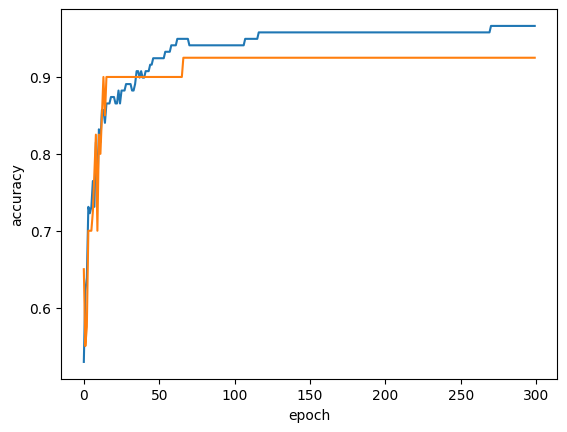

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [ ]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
#loss 매개변수를 log가 아닌 hinge 손실로 설정한다면?
sc=SGDClassifier(loss = 'hinge', max_iter=100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 결정 트리

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe() #평균, 표준편차, 최소, 최대, 1사분위수, 중간값, 3사분위수를 보여줌.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) #훈련세트, 테스트 세트 전처리

In [ ]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
#로지스틱 회귀가 학습한 계수와 절편  ---> 결과 나오는 걸 보면, 왜 저렇게 학습했는지 직관적으로 이해하기 어려움. 남한테 이 값을 이용해서 설명하기도 어려움
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [ ]:
#결정트리 모델을 쓰면 설명이 쉬워진다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


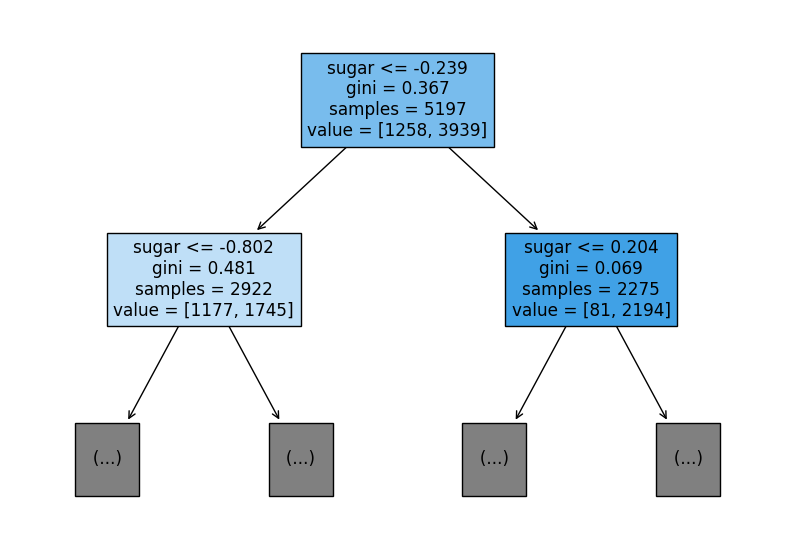

In [ ]:
#plot_tree() 함수에서 트리의 깊이 제한해서 출력하기.

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
#가지치기: 트리의 최대 깊이 정하기

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


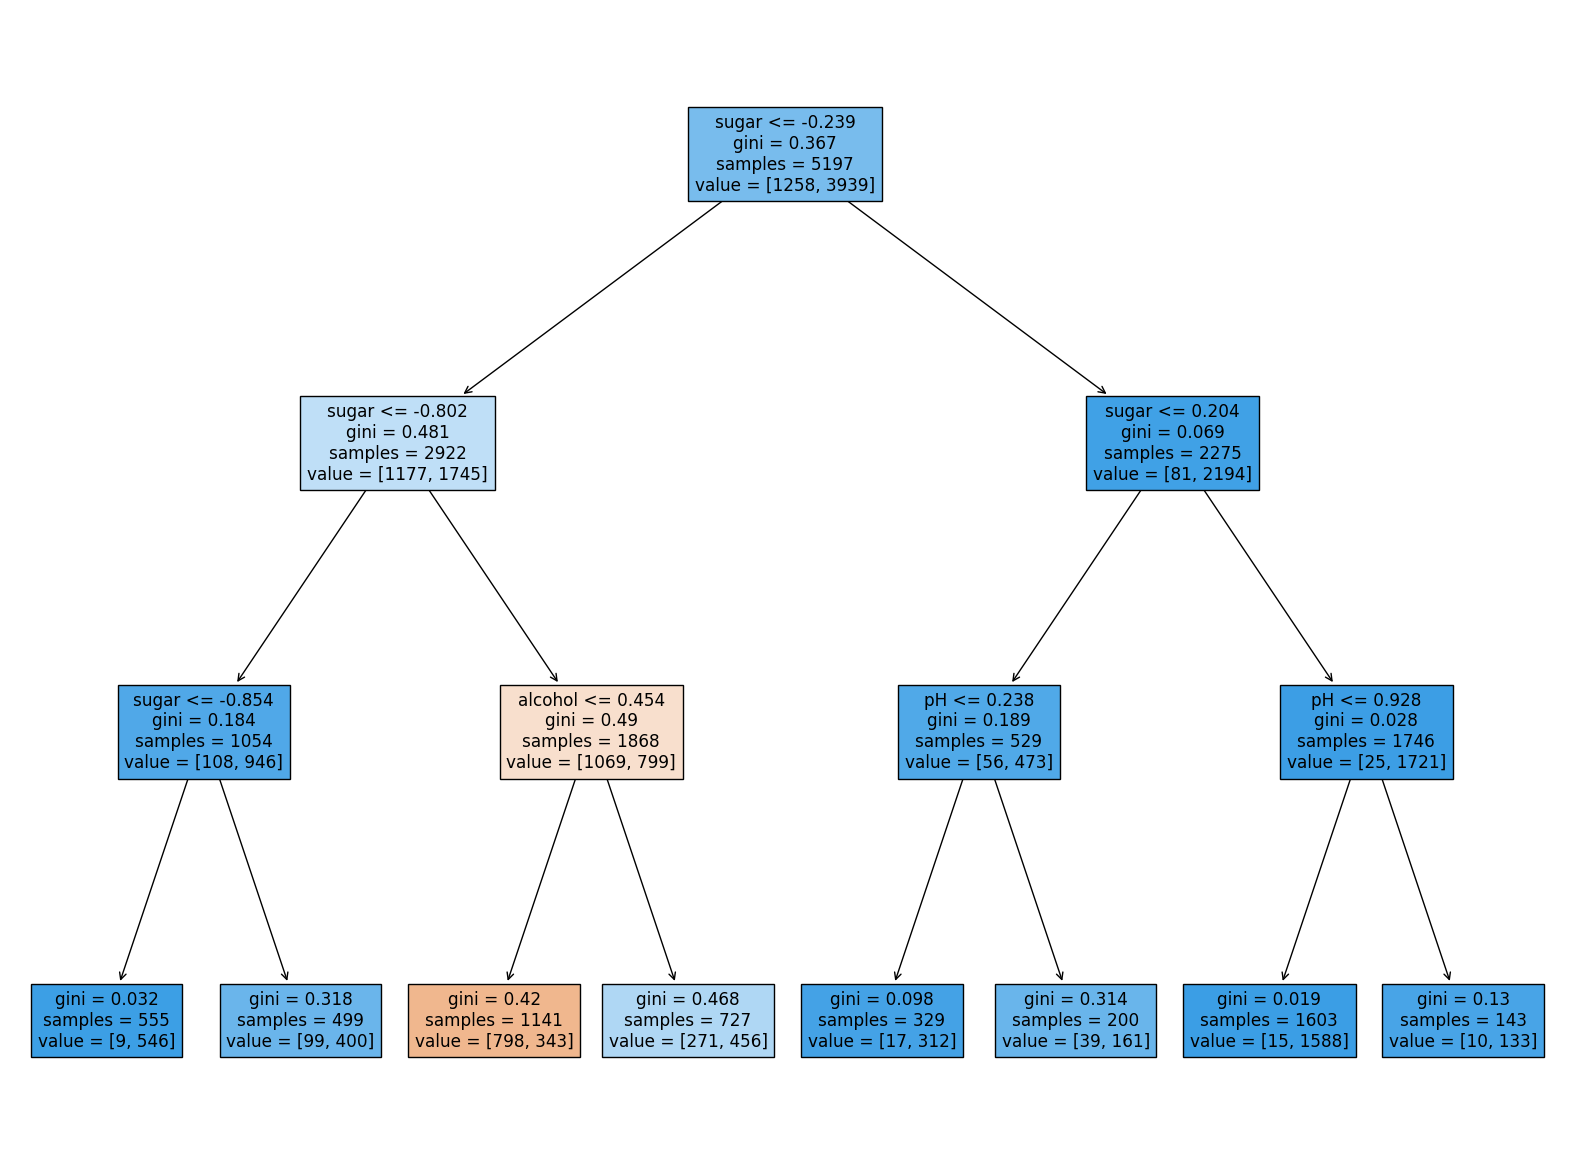

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt,filled=True,feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
#결정 트리 알고리즘은 불순도를 기준으로 샘플을 나눈다. 불순도는 클래스별 비율을 가지고 계산하므로, 특성값의 스케일은 계산에 영향을 안 준다. -->표준화 전처리 불필요

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


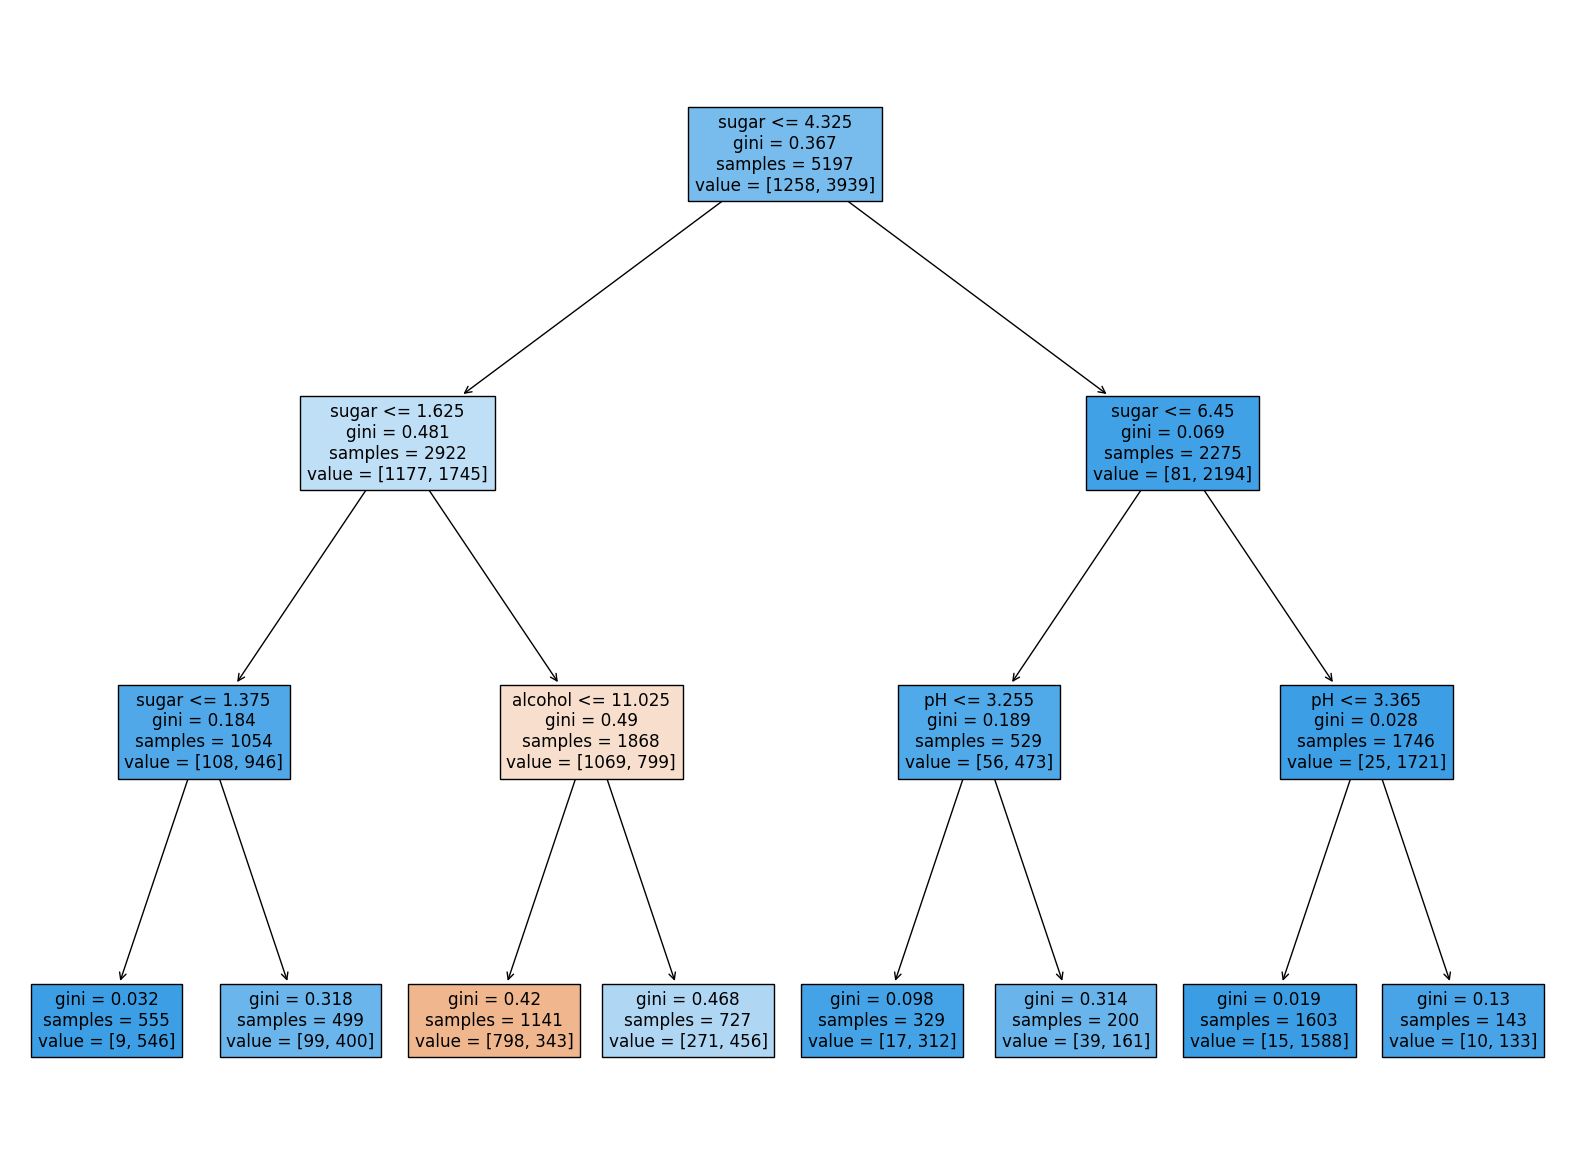

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show() #아까보다 특성값 이해하기 쉬워짐.

In [ ]:
#가장 유용한 특성은?
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


[도수-당도-pH]  ---> 당도, 도수, pH 순으로 중요도가 높고,  중요도값 모두 더하면 1이 된다.

0.8874350586877044
0.8615384615384616


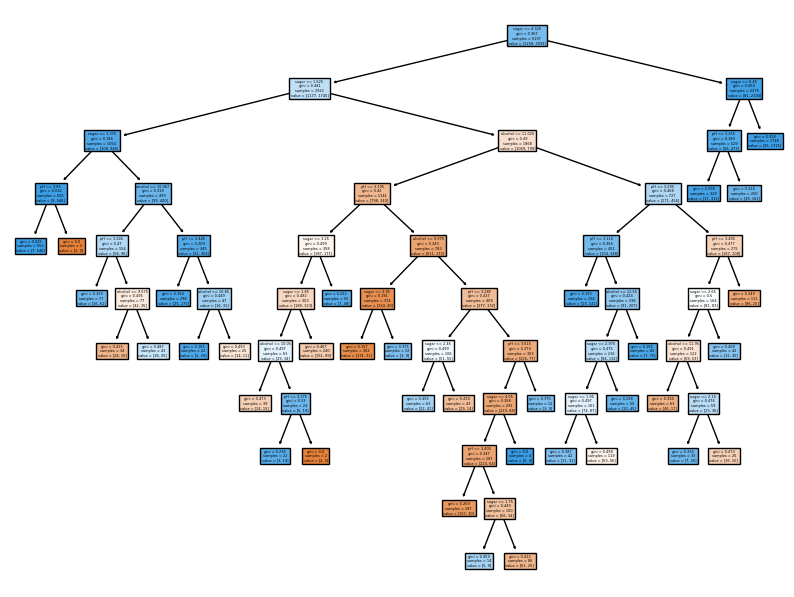

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(10, 7.5))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차검증과 그리드 서치

검증 세트: 훈련세트와 테스트세트 말고 검증을 위해서 떼어 놓은 것.

훈련-> 검증 -> 테스트 순으로 진행한다.

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
#sub_input, sub_target은 훈련세트, val_input, val_target은 검증세트이다.

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))
#훈련세트에 과대적합 되어있음.

0.9971133028626413
0.864423076923077


**교차검증: **

검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복한다. 반복할 때마다 다른 검증 세트를 선택할 수 있게 만들어서 정확도를 높인다. 훈련 세트를 다섯 부분으로 나눠서 교차 검증을 수행하면 5-폴드 교차검증이라고 함.

사이킷런의 cross_validate()함수 사용.

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00956011, 0.00745416, 0.01089334, 0.00752687, 0.0077076 ]), 'score_time': array([0.0014894 , 0.00111008, 0.00121522, 0.00137615, 0.0011766 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
#훈련세트를 섞은 후 10-폴드 교차 검증을 수행하고 싶다면?
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),   #첫번째 매개변수 값에서 두 번째 매개변수에 도달할 때까지 세 번째 매개변수를 계속 더한 배열을 만듦. (9개)
          'max_depth': range(5, 20, 1), #이것도 위와 마찬가지 but 정수만 사용 가능함. (15개)
          'min_samples_split': range(2, 100, 10) #(10개)
          }
          #매개변수 종류: 불순도 감소 최소량, 최대 트리 깊이, 노드를 나누기 위한 최소 샘플 수
          # 이 매개변수로 수행할 교차검증 횟수는 9 x 15 x 10으로 1350개. 근데 이런 걸 최소 다섯번(5폴드 교차 검증)수행하니까 모델은 6750개나 된다.


In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_) #최상의 매개변수 조합

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score'])) #최상의 교차 검증 점수

0.8683865773302731


# 랜덤 서치
매개변수 값의 목록을 전달하는 게 아니라 매개변수를 샘플링할 수 있는 확률분포 객체를 전달한다.

In [ ]:
from scipy.stats import uniform, randint #uniform은 정숫값, randint는 실숫값을 균등 샘플링함.

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

array([2, 6, 2, 0, 9, 4, 5, 9, 7, 5])

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)
#주어진 확률 분포를 따르는 1000개의 무작위 표본을 생성하고, 이 표본 내에서 고유한 값들과 그 값들의 등장 횟수를 반환

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([106,  96,  82, 108, 104,  97,  97, 104, 105, 101]))

In [ ]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.19246665, 0.53968031, 0.17214482, 0.49778174, 0.09430131,
       0.47138765, 0.84342152, 0.45503261, 0.99400188, 0.29078262])

In [ ]:
#min_smaples_leaf: 리프 노드가 되기 위한 최소 샘플의 개수.
# 이것까지 추가해서 탐색할 매개변수의 딕셔너리 만들기

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, n_iter=100, n_jobs=-1, random_state=42) #params에 정의된 매개변수 범위에서 총 100번을 샘플링해서 교차검증 수행.
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5aa51dab60>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f5ae4178dc0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5aa51db580>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5aa51db070>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8458726956392981


In [ ]:
#최적의 모델은 이미 전체 훈련세트(train_input, train_target)로 훈련되어 있다.
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.786923076923077
